In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
!pip install neattext

     |████████████████████████████████| 114 kB 4.5 MB/s 


In [ ]:
import neattext.functions as nfx

In [ ]:
df = pd.read_csv('dataset.csv', names=['text', 'emotion'])

In [ ]:
df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df['emotion'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: emotion, dtype: int64

In [ ]:
df['Clean_Text']=df['text'].apply(nfx.remove_userhandles)

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
df

,text,emotion,Clean_Text
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,feeling hopeless damned hopeful cares awake
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,feeling nostalgic fireplace know property
4,i am feeling grouchy,anger,feeling grouchy
...,...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness,im ssa examination tomorrow morning im prepare...
19996,i constantly worry about their fight against n...,joy,constantly worry fight nature push limits inne...
19997,i feel its important to share this info for th...,joy,feel important share info experience thing
19998,i truly feel that if you are passionate enough...,joy,truly feel passionate stay true succeed


In [ ]:
Xfeatures =df['Clean_Text']
Ylabels=df['emotion']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,Ylabels,test_size=0.3,random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(solver='lbfgs', max_iter=200))])

In [ ]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=200))])

In [ ]:
#Accuracy of Logistic Regression
pipe_lr.score(x_test,y_test)

0.8885

In [ ]:
y_true=[]
emotion=y_test.tolist()
#emotion_list = ['anger','fear','joy','love','sadness','surprise']
for i in range(0,len(emotion)):
  initial=[0,0,0,0,0,0]
  if(emotion[i]=='anger'):
    initial[0]=1
    y_true.append(initial)
  elif(emotion[i]=='fear'):
    initial[1]=1
    y_true.append(initial)
  elif(emotion[i]=='joy'):
    initial[2]=1
    y_true.append(initial)
  elif(emotion[i]=='love'):
    initial[3]=1
    y_true.append(initial)
  elif(emotion[i]=='sadness'):
    initial[4]=1
    y_true.append(initial)
  elif(emotion[i]=='surprise'):
    initial[5]=1
    y_true.append(initial)

In [ ]:
y_pred=pipe_lr.predict_proba(x_test)
loss=log_loss(y_true,y_pred)
loss

0.3422195145010116

In [ ]:
y_pred1=pipe_lr.predict(x_test)
array=confusion_matrix(y_test,y_pred1)
array

array([[ 718,   22,   32,    4,   53,    2],
       [  21,  576,   21,    4,   51,   24],
       [   6,   15, 1861,   65,   28,    5],
       [   2,    3,  105,  390,    6,    1],
       [  36,   27,   57,   14, 1618,    3],
       [   1,   37,   13,    0,   11,  168]])

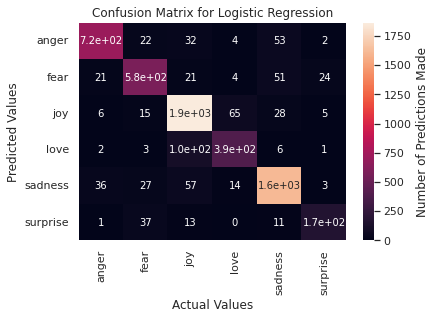

In [ ]:
df_cm = pd.DataFrame(array, range(6), range(6))
sn.set(font_scale=1) # for label size
x_axis_labels=['anger','fear','joy','love','sadness','surprise']
y_axis_labels=['anger','fear','joy','love','sadness','surprise']
figure = sn.heatmap(df_cm, annot=True, annot_kws={"size": 10},cbar_kws={'label': 'Number of Predictions Made'},xticklabels=x_axis_labels, yticklabels=y_axis_labels).get_figure()
#figure = svm.get_figure()
plt.xlabel('Actual Values', fontsize = 12)
plt.ylabel('Predicted Values', fontsize = 12)
plt.title('Confusion Matrix for Logistic Regression')
figure.savefig('confusion_lr.png',bbox_inches ="tight")


In [ ]:
classification_report_lr=classification_report(y_test,y_pred1)
classification_report_lr

'              precision    recall  f1-score   support\n\n       anger       0.92      0.86      0.89       831\n        fear       0.85      0.83      0.84       697\n         joy       0.89      0.94      0.91      1980\n        love       0.82      0.77      0.79       507\n     sadness       0.92      0.92      0.92      1755\n    surprise       0.83      0.73      0.78       230\n\n    accuracy                           0.89      6000\n   macro avg       0.87      0.84      0.85      6000\nweighted avg       0.89      0.89      0.89      6000\n'

In [ ]:
classifier_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr', OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=200)))])
classifier_lr.fit(x_train, y_train)
y_score_lr = classifier_lr.predict_proba(x_test)

In [ ]:
#score=roc_auc_score(y_test, pipe_lr.predict_proba(x_test), multi_class='ovr')

In [ ]:
y_test_label = label_binarize(y_test,classes=['anger','fear','joy','love','sadness','surprise'])

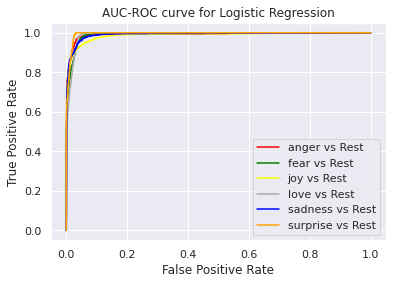

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
thresh =dict()
for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_label[:, i], y_score_lr[:, i],pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.plot(fpr[0], tpr[0], color='red', label='anger vs Rest')
plt.plot(fpr[1], tpr[1], color='green', label='fear vs Rest')
plt.plot(fpr[2], tpr[2], color='yellow', label='joy vs Rest')
plt.plot(fpr[3], tpr[3], color='darkgrey', label='love vs Rest')
plt.plot(fpr[4], tpr[4], color='blue', label='sadness vs Rest')
plt.plot(fpr[5], tpr[5], color='orange', label='surprise vs Rest')
plt.title('AUC-ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('roc_lr.png')

In [ ]:
pipe_nb = Pipeline(steps=[('cv',CountVectorizer()),('nb',naive_bayes.MultinomialNB(alpha=0.3))])

In [ ]:
pipe_nb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB(alpha=0.3))])

In [ ]:
#Accuracy of Naive Bayes
pipe_nb.score(x_test,y_test)

0.8046666666666666

In [ ]:
y_pred=pipe_nb.predict_proba(x_test)
log_loss(y_true,y_pred)

0.6335337803626995

In [ ]:
y_pred1=pipe_nb.predict(x_test)
array=confusion_matrix(y_test,y_pred1)

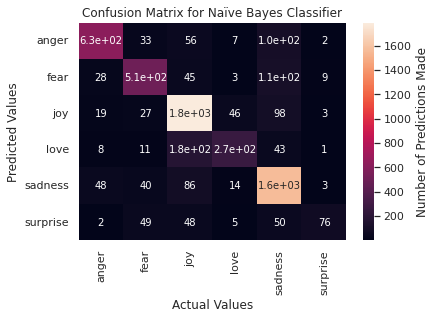

In [ ]:
df_cm = pd.DataFrame(array, range(6), range(6))
sn.set(font_scale=1) # for label size
x_axis_labels=['anger','fear','joy','love','sadness','surprise']
y_axis_labels=['anger','fear','joy','love','sadness','surprise']
figure = sn.heatmap(df_cm, annot=True, annot_kws={"size": 10},cbar_kws={'label': 'Number of Predictions Made'},xticklabels=x_axis_labels, yticklabels=y_axis_labels).get_figure()
#figure = svm.get_figure()
plt.xlabel('Actual Values', fontsize = 12)
plt.ylabel('Predicted Values', fontsize = 12)
plt.title('Confusion Matrix for Naïve Bayes Classifier')
figure.savefig('confusion_nb.png',bbox_inches ="tight")

In [ ]:
classification_report_nb=classification_report(y_test,y_pred1)
classification_report_nb

'              precision    recall  f1-score   support\n\n       anger       0.86      0.76      0.80       831\n        fear       0.76      0.73      0.74       697\n         joy       0.81      0.90      0.86      1980\n        love       0.78      0.53      0.63       507\n     sadness       0.80      0.89      0.84      1755\n    surprise       0.81      0.33      0.47       230\n\n    accuracy                           0.80      6000\n   macro avg       0.80      0.69      0.72      6000\nweighted avg       0.80      0.80      0.80      6000\n'

In [ ]:
classifier_nb = Pipeline(steps=[('cv',CountVectorizer()),('nb', OneVsRestClassifier(naive_bayes.MultinomialNB(alpha=0.3)))])
classifier_nb.fit(x_train, y_train)
y_score_nb = classifier_nb.predict_proba(x_test)

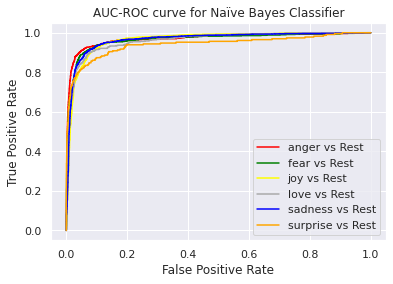

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
thresh =dict()
for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_label[:, i], y_score_nb[:, i],pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.plot(fpr[0], tpr[0], color='red', label='anger vs Rest')
plt.plot(fpr[1], tpr[1], color='green', label='fear vs Rest')
plt.plot(fpr[2], tpr[2], color='yellow', label='joy vs Rest')
plt.plot(fpr[3], tpr[3], color='darkgrey', label='love vs Rest')
plt.plot(fpr[4], tpr[4], color='blue', label='sadness vs Rest')
plt.plot(fpr[5], tpr[5], color='orange', label='surprise vs Rest')
plt.title('AUC-ROC curve for Naïve Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('roc_nb.png')

In [ ]:
n_estimators = 10

In [ ]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svm',BaggingClassifier(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True),max_samples=1.0 / n_estimators, n_estimators=n_estimators,n_jobs=-1))])

In [ ]:
pipe_svm.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('svm',
                 BaggingClassifier(base_estimator=SVC(gamma='auto',
                                                      kernel='linear',
                                                      probability=True),
                                   max_samples=0.1, n_jobs=-1))])

In [ ]:
#Accuracy of SVM
pipe_svm.score(x_test,y_test)

0.855

In [ ]:
y_pred=pipe_svm.predict_proba(x_test)
log_loss(y_true,y_pred)

0.5905906626403993

In [ ]:
y_pred1=pipe_svm.predict(x_test)
array=confusion_matrix(y_test,y_pred1)

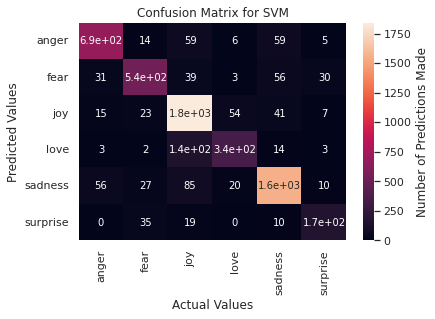

In [ ]:
df_cm = pd.DataFrame(array, range(6), range(6))
sn.set(font_scale=1) # for label size
x_axis_labels=['anger','fear','joy','love','sadness','surprise']
y_axis_labels=['anger','fear','joy','love','sadness','surprise']
figure = sn.heatmap(df_cm, annot=True, annot_kws={"size": 10},cbar_kws={'label': 'Number of Predictions Made'},xticklabels=x_axis_labels, yticklabels=y_axis_labels).get_figure()
#figure = svm.get_figure()
plt.xlabel('Actual Values', fontsize = 12)
plt.ylabel('Predicted Values', fontsize = 12)
plt.title('Confusion Matrix for SVM')
figure.savefig('confusion_svm.png',bbox_inches ="tight")

In [ ]:
classification_report_svm=classification_report(y_test,y_pred1)
classification_report_svm

'              precision    recall  f1-score   support\n\n       anger       0.87      0.83      0.85       831\n        fear       0.84      0.77      0.81       697\n         joy       0.84      0.93      0.88      1980\n        love       0.80      0.67      0.73       507\n     sadness       0.90      0.89      0.89      1755\n    surprise       0.75      0.72      0.74       230\n\n    accuracy                           0.85      6000\n   macro avg       0.83      0.80      0.82      6000\nweighted avg       0.85      0.85      0.85      6000\n'

In [ ]:
classifier_svm = Pipeline(steps=[('cv',CountVectorizer()),('svm', OneVsRestClassifier(BaggingClassifier(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True),max_samples=1.0 / n_estimators, n_estimators=n_estimators,n_jobs=-1)))])
classifier_svm.fit(x_train, y_train)
y_score_svm = classifier_svm.predict_proba(x_test)

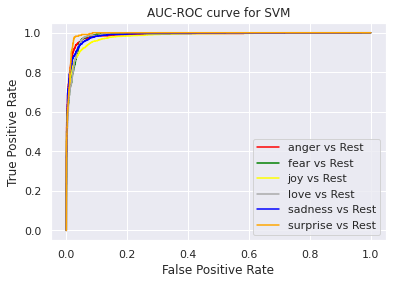

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
thresh =dict()
for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_label[:, i], y_score_svm[:, i],pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.plot(fpr[0], tpr[0], color='red', label='anger vs Rest')
plt.plot(fpr[1], tpr[1], color='green', label='fear vs Rest')
plt.plot(fpr[2], tpr[2], color='yellow', label='joy vs Rest')
plt.plot(fpr[3], tpr[3], color='darkgrey', label='love vs Rest')
plt.plot(fpr[4], tpr[4], color='blue', label='sadness vs Rest')
plt.plot(fpr[5], tpr[5], color='orange', label='surprise vs Rest')
plt.title('AUC-ROC curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('roc_svm.png')

In [ ]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier(n_estimators=n_estimators,n_jobs=-1,random_state=42))])

In [ ]:
pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('rf',
                 RandomForestClassifier(n_estimators=10, n_jobs=-1,
                                        random_state=42))])

In [ ]:
#Accuracy of Random Forest Classifier
pipe_rf.score(x_test,y_test)

0.8721666666666666

In [ ]:
y_pred=pipe_rf.predict_proba(x_test)
log_loss(y_true,y_pred)

0.6741440467663874

In [ ]:
y_pred1=pipe_rf.predict(x_test)
array=confusion_matrix(y_test,y_pred1)

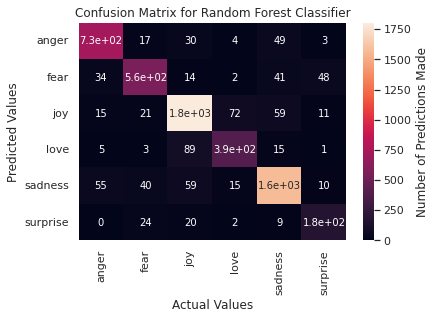

In [ ]:
df_cm = pd.DataFrame(array, range(6), range(6))
sn.set(font_scale=1) # for label size
x_axis_labels=['anger','fear','joy','love','sadness','surprise']
y_axis_labels=['anger','fear','joy','love','sadness','surprise']
figure = sn.heatmap(df_cm, annot=True, annot_kws={"size": 10},cbar_kws={'label': 'Number of Predictions Made'},xticklabels=x_axis_labels, yticklabels=y_axis_labels).get_figure()
#figure = svm.get_figure()
plt.xlabel('Actual Values', fontsize = 12)
plt.ylabel('Predicted Values', fontsize = 12)
plt.title('Confusion Matrix for Random Forest Classifier')
figure.savefig('confusion_rf.png',bbox_inches ="tight")

In [ ]:
classification_report_rf=classification_report(y_test,y_pred1)
classification_report_rf

'              precision    recall  f1-score   support\n\n       anger       0.87      0.88      0.87       831\n        fear       0.84      0.80      0.82       697\n         joy       0.89      0.91      0.90      1980\n        love       0.81      0.78      0.79       507\n     sadness       0.90      0.90      0.90      1755\n    surprise       0.71      0.76      0.73       230\n\n    accuracy                           0.87      6000\n   macro avg       0.84      0.84      0.84      6000\nweighted avg       0.87      0.87      0.87      6000\n'

In [ ]:
classifier_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', OneVsRestClassifier(RandomForestClassifier(n_estimators=50,criterion="entropy",n_jobs=-1,random_state=42)))])
classifier_rf.fit(x_train, y_train)
y_score_rf = classifier_rf.predict_proba(x_test)

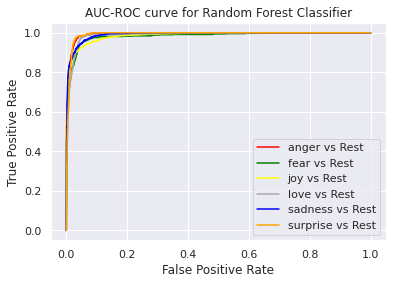

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
thresh =dict()
for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_label[:, i], y_score_rf[:, i],pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.plot(fpr[0], tpr[0], color='red', label='anger vs Rest')
plt.plot(fpr[1], tpr[1], color='green', label='fear vs Rest')
plt.plot(fpr[2], tpr[2], color='yellow', label='joy vs Rest')
plt.plot(fpr[3], tpr[3], color='darkgrey', label='love vs Rest')
plt.plot(fpr[4], tpr[4], color='blue', label='sadness vs Rest')
plt.plot(fpr[5], tpr[5], color='orange', label='surprise vs Rest')
plt.title('AUC-ROC curve for Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('roc_rf.png')

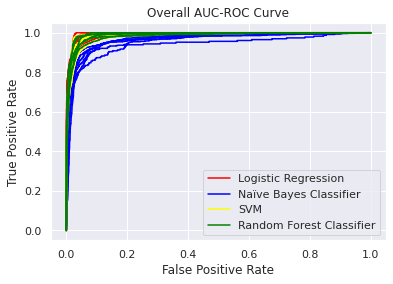

In [ ]:
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
thresh_lr =dict()
for i in range(6):
    fpr_lr[i], tpr_lr[i], thresh_lr[i] = roc_curve(y_test_label[:, i], y_score_lr[:, i],pos_label=1)
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])
plt.plot(fpr_lr[0], tpr_lr[0], color='red', label='Logistic Regression')
plt.plot(fpr_lr[1], tpr_lr[1], color='red')
plt.plot(fpr_lr[2], tpr_lr[2], color='red')
plt.plot(fpr_lr[3], tpr_lr[3], color='red')
plt.plot(fpr_lr[4], tpr_lr[4], color='red')
plt.plot(fpr_lr[5], tpr_lr[5], color='red')

fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()
thresh_nb =dict()
for i in range(6):
    fpr_nb[i], tpr_nb[i], thresh_nb[i] = roc_curve(y_test_label[:, i], y_score_nb[:, i],pos_label=1)
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])
plt.plot(fpr_nb[0], tpr_nb[0], color='blue', label='Naïve Bayes Classifier')
plt.plot(fpr_nb[1], tpr_nb[1], color='blue')
plt.plot(fpr_nb[2], tpr_nb[2], color='blue')
plt.plot(fpr_nb[3], tpr_nb[3], color='blue')
plt.plot(fpr_nb[4], tpr_nb[4], color='blue')
plt.plot(fpr_nb[5], tpr_nb[5], color='blue')

fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
thresh_svm =dict()
for i in range(6):
    fpr_svm[i], tpr_svm[i], thresh_svm[i] = roc_curve(y_test_label[:, i], y_score_svm[:, i],pos_label=1)
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])
plt.plot(fpr_svm[0], tpr_svm[0], color='yellow', label='SVM')
plt.plot(fpr_svm[1], tpr_svm[1], color='yellow')
plt.plot(fpr_svm[2], tpr_svm[2], color='yellow')
plt.plot(fpr_svm[3], tpr_svm[3], color='yellow')
plt.plot(fpr_svm[4], tpr_svm[4], color='yellow')
plt.plot(fpr_svm[5], tpr_svm[5], color='yellow')

fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
thresh_rf =dict()
for i in range(6):
    fpr_rf[i], tpr_rf[i], thresh_rf[i] = roc_curve(y_test_label[:, i], y_score_rf[:, i],pos_label=1)
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])
plt.plot(fpr_rf[0], tpr_rf[0], color='green', label='Random Forest Classifier')
plt.plot(fpr_rf[1], tpr_rf[1], color='green')
plt.plot(fpr_rf[2], tpr_rf[2], color='green')
plt.plot(fpr_rf[3], tpr_rf[3], color='green')
plt.plot(fpr_rf[4], tpr_rf[4], color='green')
plt.plot(fpr_rf[5], tpr_rf[5], color='green')


plt.title('Overall AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('overall_roc.png')

In [ ]:
emotion_list = ['anger','fear','joy','love','sadness','suprise']
emoji = {'joy':'😀','sadness':'😔','anger':'😠','fear':'😨','love':'🥰','suprise':'😲'}

In [ ]:
ex1 = "on seeing a huge snake, i screamed aloud"

In [ ]:
def get_prediction_proba(docx):
	result_lr = pipe_lr.predict_proba([docx])
	result_nb = pipe_nb.predict_proba([docx])
	result_svm = pipe_svm.predict_proba([docx])
	result_rf = pipe_rf.predict_proba([docx])
	max_lr = np.max(pipe_lr.predict_proba([docx]))
	max_nb = np.max(pipe_nb.predict_proba([docx]))
	max_svm = np.max(pipe_svm.predict_proba([docx]))
	max_rf = np.max(pipe_rf.predict_proba([docx]))
	if(max_lr>max_nb and max_lr>max_svm and max_lr>max_rf):
		return [result_lr,pipe_lr.predict([docx])[0]]
	elif(max_nb>max_lr and max_nb>max_svm and max_nb>max_rf):
		return [result_nb,pipe_nb.predict([docx])[0]]
	elif(max_svm>max_lr and max_svm>max_nb and max_svm>max_rf):
		return [result_svm,pipe_svm.predict([docx])[0]]
	else:
		return [result_rf,pipe_rf.predict([docx])[0]]

In [ ]:
result_lr = pipe_lr.predict_proba([ex1])
result_nb = pipe_nb.predict_proba([ex1])
result_svm = pipe_svm.predict_proba([ex1])
result_rf = pipe_rf.predict_proba([ex1])
print(result_lr[0])
print(result_nb[0])
print(result_svm[0])
print(result_rf[0])

[0.13763704 0.33894029 0.18816637 0.03757677 0.27994388 0.01773565]
[0.05019013 0.6310411  0.14334516 0.0891661  0.04389166 0.04236584]
[0.14007489 0.18625244 0.31109753 0.03355368 0.30604597 0.02297549]
[0.3 0.4 0.3 0.  0.  0. ]


In [ ]:
probability = get_prediction_proba(ex1)
predicted_emotion = probability[1]
probability = probability[0][0]
for i in range(len(probability)):
  probability[i]=probability[i]*100
probability

array([ 5.01901339, 63.10411044, 14.33451606,  8.91661031,  4.38916587,
        4.23658394])

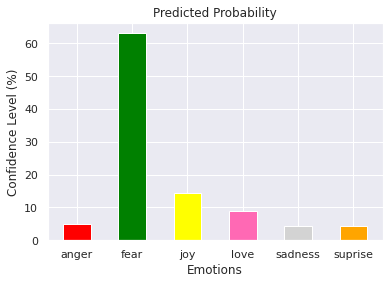

In [ ]:
plt.bar([0,10,20,30,40,50],probability,tick_label = emotion_list,width=5,color=['red','green','yellow','hotpink','lightgrey','orange'])
plt.xlabel('Emotions')
plt.ylabel('Confidence Level (%)')
plt.title('Predicted Probability')
plt.savefig('graph.png')

In [ ]:
confidence = np.max(probability)

In [ ]:
print("The predicted emotion is "+predicted_emotion+emoji[predicted_emotion]+" with the confidence level of: "+str(confidence)+"%")

The predicted emotion is fear😨 with the confidence level of: 63.104110436028215%
